# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
# api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={your api key} 
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# cities


In [4]:
set_counter = 1
record_counter = 0
df_columns = ['City', 'Lat' , 'Lng',
                'Max Temp', 'Humidity',
                'Cloudiness','Wind Speed',
                'Country', 'Date']
city_data_list = []
for city in cities:
    try:
        url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
        city_data = requests.get(url).json()
        print(f'Processing Record {record_counter} of Set {set_counter} | {city}')
        city_data_list.append([city,city_data['coord']['lat'],city_data['coord']['lon'],
                               city_data['main']['temp_max'],city_data['main']['humidity'],
                               city_data['clouds']['all'], city_data['wind']['speed'],
                               city_data['sys']['country'],city_data['dt']])
    except:
        print('City not found. Skipping...')
        print(city_data)
#     weather_dict['City'].append()
#     weather_dict['City'].append()
#     weather_dict['City'].append()
#     weather_dict['City'].append()
#     weather_dict['City'].append()
#     weather_dict['City'].append()
#     weather_dict['City'].append()
#     weather_dict['City'].append()
    if record_counter == 49:
        record_counter = 0
        set_counter += 1
    record_counter +=1
#     break
citydf = pd.DataFrame(np.array(city_data_list),columns =df_columns)

Processing Record 0 of Set 1 | oranjestad
Processing Record 1 of Set 1 | norman wells
Processing Record 2 of Set 1 | abu kamal
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | coihaique
Processing Record 5 of Set 1 | lagoa
Processing Record 6 of Set 1 | zhezkazgan
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | ukiah
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | bibiani
Processing Record 12 of Set 1 | victoria
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | hambantota
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | marcona
City not found. Skipping...
{'cod': '404', 'message': 'city not found'}
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | amderma
City not found. Skipping...
{'cod': '404', 'message': 'city not found'}
Processing Record 20 of Set 1 | kavaratti
Pro

Processing Record 31 of Set 4 | tsabong
Processing Record 32 of Set 4 | talnakh
Processing Record 33 of Set 4 | katsuura
Processing Record 34 of Set 4 | rawson
Processing Record 35 of Set 4 | imbituba
Processing Record 36 of Set 4 | merzifon
Processing Record 37 of Set 4 | cidreira
Processing Record 38 of Set 4 | atuona
Processing Record 39 of Set 4 | anadyr
Processing Record 40 of Set 4 | arang
Processing Record 41 of Set 4 | keti bandar
Processing Record 42 of Set 4 | aloja
Processing Record 43 of Set 4 | lagonoy
Processing Record 44 of Set 4 | prince rupert
Processing Record 45 of Set 4 | porto novo
Processing Record 46 of Set 4 | kamenka
Processing Record 47 of Set 4 | akureyri
Processing Record 48 of Set 4 | solaro
Processing Record 49 of Set 4 | kaitangata
Processing Record 1 of Set 5 | lyaskelya
Processing Record 2 of Set 5 | soe
Processing Record 3 of Set 5 | wanning
Processing Record 4 of Set 5 | machaneng
Processing Record 5 of Set 5 | north bend
Processing Record 6 of Set 5 

Processing Record 9 of Set 8 | shingu
Processing Record 10 of Set 8 | kihei
Processing Record 11 of Set 8 | kulhudhuffushi
Processing Record 12 of Set 8 | walvis bay
Processing Record 13 of Set 8 | bandarbeyla
Processing Record 14 of Set 8 | bilibino
Processing Record 15 of Set 8 | araouane
Processing Record 16 of Set 8 | toora-khem
Processing Record 17 of Set 8 | hastings
Processing Record 18 of Set 8 | turtas
Processing Record 19 of Set 8 | emba
Processing Record 20 of Set 8 | mecca
Processing Record 21 of Set 8 | boyolangu
Processing Record 22 of Set 8 | marv dasht
City not found. Skipping...
{'cod': '404', 'message': 'city not found'}
Processing Record 23 of Set 8 | panguna
Processing Record 24 of Set 8 | half moon bay
Processing Record 25 of Set 8 | sinnamary
Processing Record 26 of Set 8 | nome
Processing Record 27 of Set 8 | kenai
Processing Record 28 of Set 8 | andenes
Processing Record 29 of Set 8 | ewa beach
Processing Record 30 of Set 8 | piterka
Processing Record 31 of Set 

Processing Record 42 of Set 11 | la romana
Processing Record 43 of Set 11 | asyut
Processing Record 44 of Set 11 | byron bay
Processing Record 45 of Set 11 | nisia floresta
Processing Record 46 of Set 11 | weihe
Processing Record 47 of Set 11 | ekhabi
Processing Record 48 of Set 11 | finschhafen
Processing Record 49 of Set 11 | hualmay
Processing Record 1 of Set 12 | mbalmayo
Processing Record 2 of Set 12 | north port
Processing Record 3 of Set 12 | chicama
Processing Record 4 of Set 12 | marathopolis
City not found. Skipping...
{'cod': '404', 'message': 'city not found'}
Processing Record 5 of Set 12 | honiara
Processing Record 6 of Set 12 | burns lake
Processing Record 7 of Set 12 | mount gambier
Processing Record 8 of Set 12 | sambava
Processing Record 9 of Set 12 | cherskiy
Processing Record 10 of Set 12 | boa vista
Processing Record 11 of Set 12 | kalangala
Processing Record 12 of Set 12 | yar-sale
Processing Record 13 of Set 12 | vila velha
Processing Record 14 of Set 12 | khani


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
citydf['Lat'] = citydf['Lat'].astype(float)
citydf['Lng'] = citydf['Lng'].astype(float)
citydf['Max Temp'] = citydf['Max Temp'].astype(float)
citydf['Humidity'] = citydf['Humidity'].astype(float)
citydf['Cloudiness'] = citydf['Cloudiness'].astype(float)
citydf['Wind Speed'] = citydf['Wind Speed'].astype(float)
citydf.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [6]:
citydf.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,oranjestad,12.52,-70.03,28.00,78.0,20.0,8.70,AW,1595898569
1,norman wells,65.28,-126.83,20.00,52.0,75.0,5.10,CA,1595898569
2,abu kamal,34.45,40.92,34.78,12.0,0.0,3.64,SY,1595898569
3,ushuaia,-54.80,-68.30,1.00,80.0,40.0,11.80,AR,1595898524
4,coihaique,-45.58,-72.07,3.00,74.0,20.0,1.50,CL,1595898569


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:

too_hum_index = citydf.loc[citydf['Humidity'] >= 100].index

#  Get the indices of cities that have humidity over 100%.
# too_hum_index
citydf.iloc[:,1:7].describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,19.864110,20.577089,20.650908,72.308219,49.803082,3.455668
std,32.556887,89.967642,7.790774,19.649088,40.559855,2.384129
min,-54.800000,-179.170000,1.000000,9.000000,0.000000,0.040000
25%,-6.245000,-59.825000,14.772500,63.000000,1.000000,1.500000
50%,21.410000,24.740000,21.670000,76.000000,50.000000,2.940000
75%,47.702500,102.262500,26.697500,87.000000,92.000000,4.930000
max,78.220000,179.320000,44.000000,100.000000,100.000000,13.900000


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = citydf.drop(too_hum_index, inplace = False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,oranjestad,12.52,-70.03,28.00,78.0,20.0,8.70,AW,1595898569
1,norman wells,65.28,-126.83,20.00,52.0,75.0,5.10,CA,1595898569
2,abu kamal,34.45,40.92,34.78,12.0,0.0,3.64,SY,1595898569
3,ushuaia,-54.80,-68.30,1.00,80.0,40.0,11.80,AR,1595898524
4,coihaique,-45.58,-72.07,3.00,74.0,20.0,1.50,CL,1595898569


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
clean_city_data.to_csv('City_Data.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

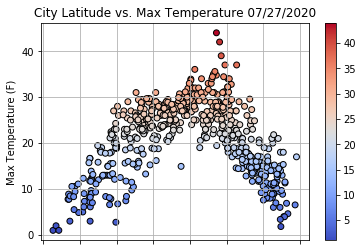

In [10]:
clean_city_data = pd.read_csv('City_Data.csv')
today =datetime.date.today().strftime("%m/%d/%Y")
heatValue = clean_city_data['Max Temp']

clean_city_data.plot('Lat','Max Temp',kind= 'scatter',title = f'City Latitude vs. Max Temperature {today}',
                    grid = True, edgecolors="black",c = heatValue,cmap = 'coolwarm', s =35)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
# plt.tight_layout()
plt.show()

## Latitude vs. Humidity Plot

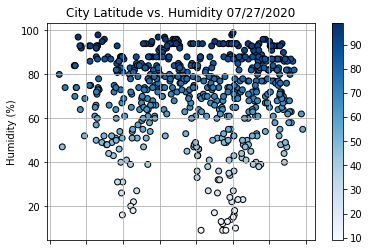

In [11]:
heatValue = clean_city_data['Humidity']
clean_city_data.plot('Lat','Humidity',kind= 'scatter',title = f'City Latitude vs. Humidity {today}',
                    grid = True, edgecolors="black",c = heatValue,cmap = 'Blues', s =35)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
# plt.tight_layout()
plt.show()

## Latitude vs. Cloudiness Plot

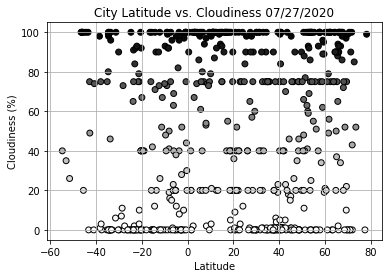

In [12]:
heatValue = clean_city_data['Cloudiness']
clean_city_data.plot('Lat','Cloudiness',kind= 'scatter',title = f'City Latitude vs. Cloudiness {today}',
                    grid = True, edgecolors="black",c = heatValue, s =35)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
# plt.tight_layout()
plt.show()

## Latitude vs. Wind Speed Plot

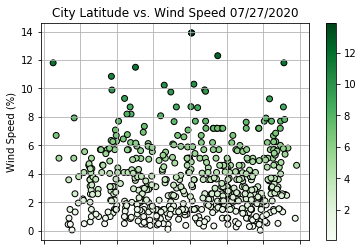

In [13]:
heatValue = clean_city_data['Wind Speed']
clean_city_data.plot('Lat','Wind Speed',kind= 'scatter',title = f'City Latitude vs. Wind Speed {today}',
                    grid = True, edgecolors="black",c = heatValue,cmap = 'Greens', s =35)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
# plt.tight_layout()
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern = clean_city_data.loc[clean_city_data['Lat'] >= 0]
southern = clean_city_data.loc[clean_city_data['Lat'] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.48326807389046667


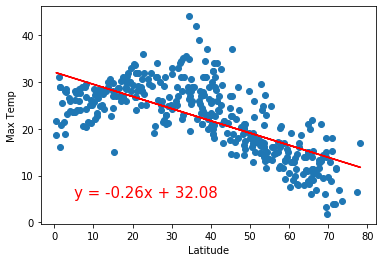

In [16]:
x_values = northern['Lat']
y_values = northern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,northern['Lat'].min()+5),fontsize=15,color="red")
print(f'The r-squared is: {rvalue**2}')
# plt.ylim(0,90)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5994089961222367


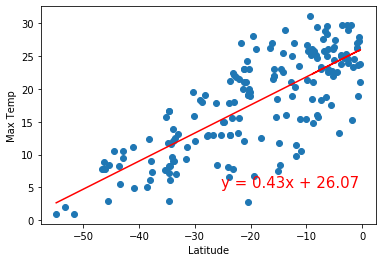

In [17]:
x_values = southern['Lat']
y_values = southern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(southern['Lat'].max()-25,5),fontsize=15,color="red")
print(f'The r-squared is: {rvalue**2}')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0037594972231466007


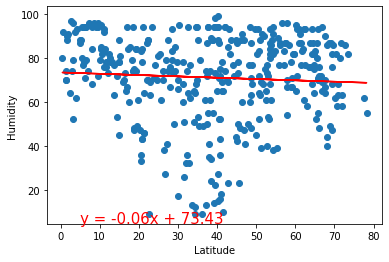

In [18]:
x_values = northern['Lat']
y_values = northern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,southern['Lat'].max()+5),fontsize=15,color="red")
print(f'The r-squared is: {rvalue**2}')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0009851654928573115


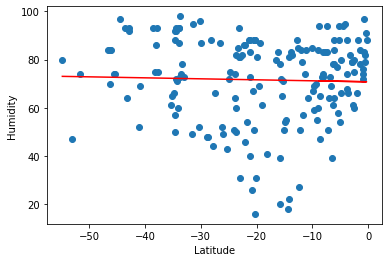

In [19]:
x_values = southern['Lat']
y_values = southern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(southern['Lat'].max()-25,5),fontsize=15,color="red")
print(f'The r-squared is: {rvalue**2}')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0011628868083173216


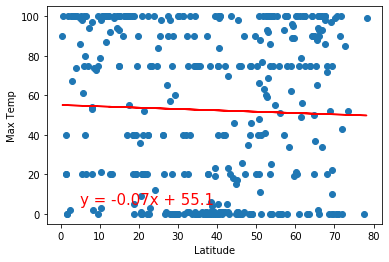

In [20]:
x_values = northern['Lat']
y_values = northern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,southern['Lat'].max()+5),fontsize=15,color="red")
print(f'The r-squared is: {rvalue**2}')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0008141335674014825


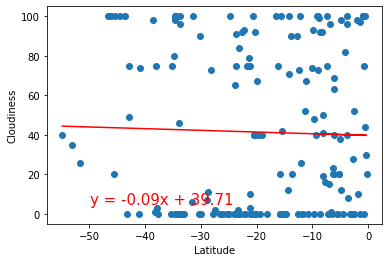

In [21]:
x_values = southern['Lat']
y_values = southern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(southern['Lat'].min()+5,5),fontsize=15,color="red")
print(f'The r-squared is: {rvalue**2}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.002233056909513466


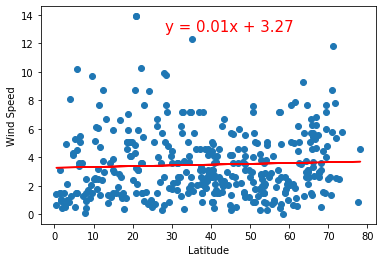

In [22]:
x_values = northern['Lat']
y_values = northern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(northern['Lat'].max()-50,northern['Wind Speed'].max()-1),fontsize=15,color="red")
print(f'The r-squared is: {rvalue**2}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.006110312612861142


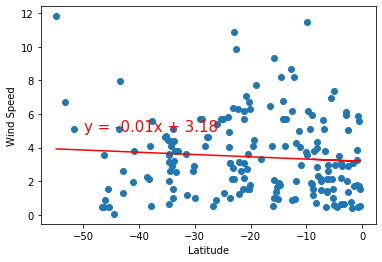

In [23]:
x_values = southern['Lat']
y_values = southern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(southern['Lat'].min()+5,5),fontsize=15,color="red")
print(f'The r-squared is: {rvalue**2}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()